In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import datetime
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import gc
import glob

from netCDF4 import Dataset

from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects

In [2]:
def data_reader(variable:str):
    """
    This function is a data reader function that read data of 
    LAM 1km model using the specific variables: cloud, rad, turb and wind.
    
    variable: str
            "enter either rad or wind in strings as variable"
            E.g. data_reader("wind") or data_reader("rad")
    """
    
    path = '/glade/campaign/uwyo/wyom0122/lam/new_runs/031220/RESTART_*'
    data = f'wrfout_{variable}_d02_2020-03-1[3-4]*'
    res = np.sort(glob.glob(f'{path}/{data}'))
    
    elements_to_remove = [f'/glade/campaign/uwyo/wyom0122/lam/new_runs/031220/RESTART_B/wrfout_{variable}_d02_2020-03-13_00_00_00',
                      f'/glade/campaign/uwyo/wyom0122/lam/new_runs/031220/RESTART_D/wrfout_{variable}_d02_2020-03-13_06_00_00',
                      f'/glade/campaign/uwyo/wyom0122/lam/new_runs/031220/RESTART_E/wrfout_{variable}_d02_2020-03-13_12_00_00',
                      f'/glade/campaign/uwyo/wyom0122/lam/new_runs/031220/RESTART_F/wrfout_{variable}_d02_2020-03-13_18_30_00']
    
    array = np.delete(res, np.where(np.isin(res, elements_to_remove)))

    return array

In [3]:
radar = data_reader(variable="rad")
wind = data_reader(variable="wind")

In [4]:
def combining_dataarray(data, var):
    # appending the radar dataset into one dataset
    dataset = []
    for index, ncfile in enumerate(data):
        ds = xr.open_dataset(ncfile, engine='netcdf4')
        
        ds_var = ds[var]
        dataset.append(ds_var)

    # Concat dataset over time
    dd = xr.concat(dataset, dim='Time')
    return dd

In [5]:
radar_ds = combining_dataarray(radar, 'RAINNC')
time_ds = combining_dataarray(radar, 'Times')
# wind_ds = combining_dataset(wind)

In [6]:
# U = combining_dataarray(wind, 'U')
# V = combining_dataarray(wind, 'V')
# W = combining_dataarray(wind, 'W')

In [7]:
# #getting lat and lon from wind
# path1 = '/glade/campaign/uwyo/wyom0122/lam/new_runs/031220/RESTART_C/'
# data_wind = 'wrfout_wind_d02_2020-03-13_00_00_00'

# # nc_file = path + data
# nc_file_wind = path1 + data_wind

# # get longitude and latitude from wind
# wind = xr.open_dataset(nc_file_wind, engine='netcdf4')
# latitude = wind['XLAT']
# longitude = wind['XLONG']

In [8]:
# U.to_netcdf('./saved-files/U-wind.nc')
# V.to_netcdf('./saved-files/V-wind.nc')
# W.to_netcdf('./saved-files/W-wind.nc')
# radar_ds.to_netcdf('./saved-files/rainnc.nc')
# time_ds.to_netcdf('./saved-files/time.nc')

In [9]:
rainnc = xr.open_dataarray('./saved-files/rainnc.nc')
U = xr.open_dataarray('./saved-files/U-wind.nc')
V = xr.open_dataarray('./saved-files/V-wind.nc')
W = xr.open_dataarray('./saved-files/W-wind.nc')
time = xr.open_dataarray('./saved-files/time.nc')

## processing time

In [10]:
time

<xarray.DataArray 'Times' (Time: 49)>
array([b'2020-03-13_00:00:00', b'2020-03-13_00:30:00', b'2020-03-13_01:00:00',
       b'2020-03-13_01:30:00', b'2020-03-13_02:00:00', b'2020-03-13_02:30:00',
       b'2020-03-13_03:00:00', b'2020-03-13_03:30:00', b'2020-03-13_04:00:00',
       b'2020-03-13_04:30:00', b'2020-03-13_05:00:00', b'2020-03-13_05:30:00',
       b'2020-03-13_06:00:00', b'2020-03-13_06:30:00', b'2020-03-13_07:00:00',
       b'2020-03-13_07:30:00', b'2020-03-13_08:00:00', b'2020-03-13_08:30:00',
       b'2020-03-13_09:00:00', b'2020-03-13_09:30:00', b'2020-03-13_10:00:00',
       b'2020-03-13_10:30:00', b'2020-03-13_11:00:00', b'2020-03-13_11:30:00',
       b'2020-03-13_12:00:00', b'2020-03-13_12:30:00', b'2020-03-13_13:00:00',
       b'2020-03-13_13:30:00', b'2020-03-13_14:00:00', b'2020-03-13_14:30:00',
       b'2020-03-13_15:00:00', b'2020-03-13_15:30:00', b'2020-03-13_16:00:00',
       b'2020-03-13_16:30:00', b'2020-03-13_17:00:00', b'2020-03-13_17:30:00',
       b'2020-03-13_18:00:00', b'2020-03-13_18:00:00', b'2020-03-13_19:00:00',
       b'2020-03-13_19:30:00', b'2020-03-13_20:00:00', b'2020-03-13_20:30:00',
       b'2020-03-13_21:00:00', b'2020-03-13_21:30:00', b'2020-03-13_22:00:00',
       b'2020-03-13_22:30:00', b'2020-03-13_23:00:00', b'2020-03-13_23:30:00',
       b'2020-03-14_00:00:00'], dtype='|S19')
Dimensions without coordinates: Time

In [11]:
# Step 1: Convert bytes to strings
string_array = np.char.decode(time)
string_array

array(['2020-03-13_00:00:00', '2020-03-13_00:30:00',
       '2020-03-13_01:00:00', '2020-03-13_01:30:00',
       '2020-03-13_02:00:00', '2020-03-13_02:30:00',
       '2020-03-13_03:00:00', '2020-03-13_03:30:00',
       '2020-03-13_04:00:00', '2020-03-13_04:30:00',
       '2020-03-13_05:00:00', '2020-03-13_05:30:00',
       '2020-03-13_06:00:00', '2020-03-13_06:30:00',
       '2020-03-13_07:00:00', '2020-03-13_07:30:00',
       '2020-03-13_08:00:00', '2020-03-13_08:30:00',
       '2020-03-13_09:00:00', '2020-03-13_09:30:00',
       '2020-03-13_10:00:00', '2020-03-13_10:30:00',
       '2020-03-13_11:00:00', '2020-03-13_11:30:00',
       '2020-03-13_12:00:00', '2020-03-13_12:30:00',
       '2020-03-13_13:00:00', '2020-03-13_13:30:00',
       '2020-03-13_14:00:00', '2020-03-13_14:30:00',
       '2020-03-13_15:00:00', '2020-03-13_15:30:00',
       '2020-03-13_16:00:00', '2020-03-13_16:30:00',
       '2020-03-13_17:00:00', '2020-03-13_17:30:00',
       '2020-03-13_18:00:00', '2020-03-13_18:0

In [12]:
# Convert the array to a pandas DataFrame
df_time = pd.DataFrame(string_array, columns=['date'])
# format the datetime format
date_format = '%Y-%m-%d_%H:%M:%S'
df_time['date'] = pd.to_datetime(df_time['date'], format=date_format)

In [13]:
df_time.head()

,date
0,2020-03-13 00:00:00
1,2020-03-13 00:30:00
2,2020-03-13 01:00:00
3,2020-03-13 01:30:00
4,2020-03-13 02:00:00


In [14]:
# Convert the numpy ndarray to an xarray DataArray
da = xr.DataArray(df_time['date'].values, name='Times')
# rename dim_0 to time
times = da.rename({'dim_0': 'Time'})
times

<xarray.DataArray 'Times' (Time: 49)>
array(['2020-03-13T00:00:00.000000000', '2020-03-13T00:30:00.000000000',
       '2020-03-13T01:00:00.000000000', '2020-03-13T01:30:00.000000000',
       '2020-03-13T02:00:00.000000000', '2020-03-13T02:30:00.000000000',
       '2020-03-13T03:00:00.000000000', '2020-03-13T03:30:00.000000000',
       '2020-03-13T04:00:00.000000000', '2020-03-13T04:30:00.000000000',
       '2020-03-13T05:00:00.000000000', '2020-03-13T05:30:00.000000000',
       '2020-03-13T06:00:00.000000000', '2020-03-13T06:30:00.000000000',
       '2020-03-13T07:00:00.000000000', '2020-03-13T07:30:00.000000000',
       '2020-03-13T08:00:00.000000000', '2020-03-13T08:30:00.000000000',
       '2020-03-13T09:00:00.000000000', '2020-03-13T09:30:00.000000000',
       '2020-03-13T10:00:00.000000000', '2020-03-13T10:30:00.000000000',
       '2020-03-13T11:00:00.000000000', '2020-03-13T11:30:00.000000000',
       '2020-03-13T12:00:00.000000000', '2020-03-13T12:30:00.000000000',
       '2020-03-13T13:00:00.000000000', '2020-03-13T13:30:00.000000000',
       '2020-03-13T14:00:00.000000000', '2020-03-13T14:30:00.000000000',
       '2020-03-13T15:00:00.000000000', '2020-03-13T15:30:00.000000000',
       '2020-03-13T16:00:00.000000000', '2020-03-13T16:30:00.000000000',
       '2020-03-13T17:00:00.000000000', '2020-03-13T17:30:00.000000000',
       '2020-03-13T18:00:00.000000000', '2020-03-13T18:00:00.000000000',
       '2020-03-13T19:00:00.000000000', '2020-03-13T19:30:00.000000000',
       '2020-03-13T20:00:00.000000000', '2020-03-13T20:30:00.000000000',
       '2020-03-13T21:00:00.000000000', '2020-03-13T21:30:00.000000000',
       '2020-03-13T22:00:00.000000000', '2020-03-13T22:30:00.000000000',
       '2020-03-13T23:00:00.000000000', '2020-03-13T23:30:00.000000000',
       '2020-03-14T00:00:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: Time

## Combining the variables in one dataset

In [15]:
# Combine dataArray
dataset = xr.Dataset({
    'rainnc': rainnc,
    'U': U,
    'V': V,
    'W': W,
    'times': times,
})

In [16]:
dataset

<xarray.Dataset>
Dimensions:  (Time: 49, south_north: 1080, west_east: 1080, bottom_top: 135, west_east_stag: 1081, south_north_stag: 1081, bottom_top_stag: 136)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top, west_east_stag, south_north_stag, bottom_top_stag
Data variables:
    rainnc   (Time, south_north, west_east) float32 ...
    U        (Time, bottom_top, south_north, west_east_stag) float32 ...
    V        (Time, bottom_top, south_north_stag, west_east) float32 ...
    W        (Time, bottom_top_stag, south_north, west_east) float32 ...
    times    (Time) datetime64[ns] 2020-03-13 2020-03-13T00:30:00 ... 2020-03-14

In [17]:
# dataset['rainnc'].values[-50]

In [25]:
# for i, v in enumerate(dataset['times']):
#     print(f"{i}----{v}")

In [30]:
CAO_start_time = dataset['rainnc'][8]  # start time -- March 13th at 4:00:00
CAO_end_time = dataset['rainnc'][48] # end time -- March 14th at 00:00:00

entire_period = CAO_end_time - CAO_start_time
entire_period

<xarray.DataArray 'rainnc' (south_north: 1080, west_east: 1080)>
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.4726310e+00, 2.1336679e+00, ..., 2.4327362e-01,
        2.3851526e-01, 0.0000000e+00],
       [0.0000000e+00, 2.3183346e+00, 2.0126202e+00, ..., 2.5244641e-01,
        2.4778169e-01, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6730343e-03,
        1.6616874e-03, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7381713e-03,
        1.7308876e-03, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 67.6 67.6 67.61 ... 76.94 76.94
    XLONG    (south_north, west_east) float32 -4.853 -4.83 ... 29.73 29.77
Dimensions without coordinates: south_north, west_east

In [33]:
np.shape(entire_period['XLONG'])

(1080, 1080)

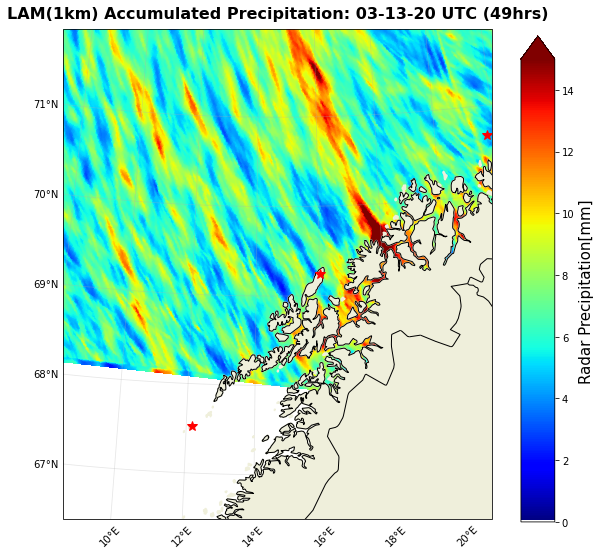

In [46]:
latA = 69.141281  # latitude of COMBLE site
lonA = 15.684166-1  # longitude of COMBLE site -1
xm, ym = 6, 2.75  # extent from center point in lon and lat

fig, ax = plt.subplots(figsize=(10, 9), subplot_kw={
                           'projection': ccrs.Orthographic(lonA, latA)})
# set extent
extent = [lonA-xm, lonA+xm, latA-ym, latA+ym]
ax.set_extent(extent)  # set extent of map


# plotting coastlines at a very high resolution: 10m
ax.coastlines(resolution='10m', zorder=7)
# add borders
ax.add_feature(cfeature.BORDERS, zorder=7)
# add land
ax.add_feature(cfeature.LAND, linewidth=1.5, alpha=1, zorder=6)
# add grid lines
gl = ax.gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=True; gl.left_labels=True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'} 
# add terrain
# ax.add_feature(cfeature.GSHHSFeature(scale='high'))
# Radar locations
ax.plot(16.00297, 69.24139, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location of Radar Andoya
ax.plot(12.1544, 67.5264, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at SW
ax.plot(21.7544, 70.664, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at NE

    
    

#     # # Create the 'jet' colormap
cmap = plt.get_cmap('jet')
# # Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)



# # change time to moth, day, year, hours and minutes
norm = Normalize(vmin=0, vmax=15)

cs = ax.pcolormesh(entire_period['XLONG'], 
                   entire_period['XLAT'], 
                   entire_period,
                   transform=ccrs.PlateCarree(),
                   cmap=new_cmap,
                   norm=norm
                      )



ax.set_title(
        f"LAM(1km) Accumulated Precipitation: 03-13-20 UTC (49hrs)", fontweight='bold', fontsize=16, pad=11)

# # # # Add a colorbar axis at the right of the graph
cbar_ax = fig.add_axes([0.85, 0.12, 0.047, 0.75])  # lbwh

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', extend='max')
cbar.set_label("Radar Precipitation[mm]", fontsize=15)

# fig.savefig('acc.png', bbox_inches='tight',dpi=500)

In [19]:
# # getting the accumulative precipitation
# precips = []
# for index in range(len(dataset['rainnc'])):
#     # we have negative indexes dataset['rainnc'].values[-1] to dataset['rainnc'].values[-49]
#     # which is before the start of the simulation
    
#     start_time_CAO = dataset['rainnc'].values[0] # March 13th at 00:00:00
#     entire_CAO_period = dataset['rainnc'].values[index] # from March 13 at 00:00:00 to March 14th at 00:00:00
#     end_time_CAO = dataset['rainnc'].values[48]
#     # result = end_time_CAO - start_time_CAO
#     result = entire_CAO_period - start_time_CAO
#     print(result)
#     # precips.append(result)

In [20]:
# # getting the accumulative precipitation
# precip = []
# for index in range(len(dataset['rainnc'])):
#     # we have negative indexes dataset['rainnc'].values[-1] to dataset['rainnc'].values[-49]
#     # which is before the start of the simulation
    
#     start_time_CAO = dataset['rainnc'][0] # March 13th at 00:00:00
#     entire_CAO_period = dataset['rainnc'][index] # from March 13 at 00:00:00 to March 14th at 00:00:00
#     results = entire_CAO_period - start_time_CAO

#     precip.append(results)

In [ ]:
CAO_start_time = dataset['rainnc'][8]  # start time -- March 13th at 4:00:00
CAO_end_time = dataset['rainnc'][48] # end time -- March 14th at 00:00:00

entire_period = CAO_end_time - CAO_start_time
entire_period

In [49]:
# for i in range(8, 49):
#     CAO_start_time1 = dataset['rainnc'][8]  # start time -- March 13th at 4:00:00
#     CAO_end_time1 = dataset['rainnc'][i] # end time -- March 14th at 00:00:00
#     entire_period1 = CAO_end_time1 - CAO_start_time1
    

(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)
(1080, 1080)


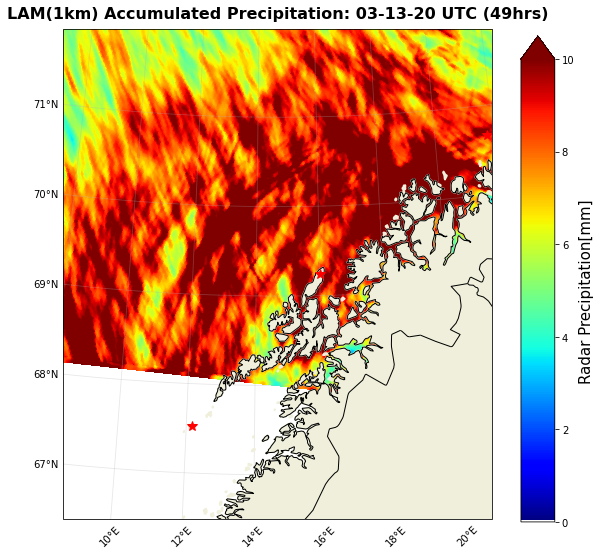

In [30]:
latA = 69.141281  # latitude of COMBLE site
lonA = 15.684166-1  # longitude of COMBLE site -1
xm, ym = 6, 2.75  # extent from center point in lon and lat

fig, ax = plt.subplots(figsize=(10, 9), subplot_kw={
                           'projection': ccrs.Orthographic(lonA, latA)})
# set extent
extent = [lonA-xm, lonA+xm, latA-ym, latA+ym]
ax.set_extent(extent)  # set extent of map


# plotting coastlines at a very high resolution: 10m
ax.coastlines(resolution='10m', zorder=7)
# add borders
ax.add_feature(cfeature.BORDERS, zorder=7)
# add land
ax.add_feature(cfeature.LAND, linewidth=1.5, alpha=1, zorder=6)
# add grid lines
gl = ax.gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=True; gl.left_labels=True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'} 
# add terrain
# ax.add_feature(cfeature.GSHHSFeature(scale='high'))
# Radar locations
ax.plot(16.00297, 69.24139, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location of Radar Andoya
ax.plot(12.1544, 67.5264, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at SW
ax.plot(21.7544, 70.664, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at NE


# # Create the 'jet' colormap
cmap = plt.get_cmap('jet')
# # Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)



# # change time to moth, day, year, hours and minutes
norm = Normalize(vmin=0, vmax=10)
# cmap = 'Blues'

cs = ax.pcolormesh(lon_sum, 
                   lat_sum, 
                   precip_mean,
                   transform=ccrs.PlateCarree(),
                   cmap=new_cmap,
                   norm=norm
                  )



ax.set_title(
        f"LAM(1km) Accumulated Precipitation: 03-13-20 UTC (49hrs)", fontweight='bold', fontsize=16, pad=11)

# # # # Add a colorbar axis at the right of the graph
cbar_ax = fig.add_axes([0.85, 0.12, 0.047, 0.75])  # lbwh

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', extend='max')
cbar.set_label("Radar Precipitation[mm]", fontsize=15)

fig.savefig('acc.png', bbox_inches='tight',dpi=500)

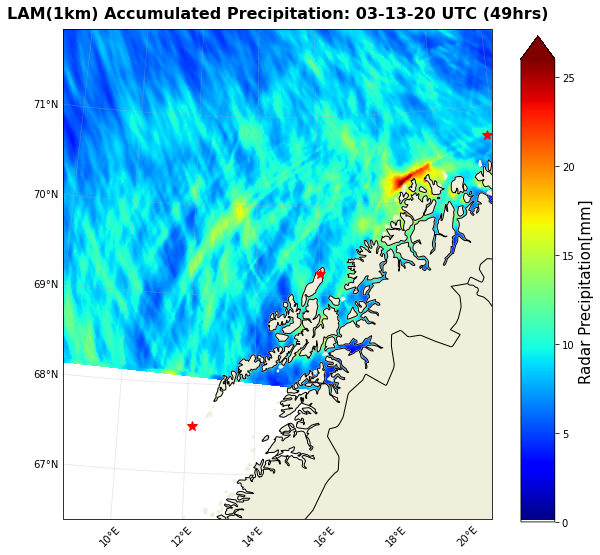

In [29]:
latA = 69.141281  # latitude of COMBLE site
lonA = 15.684166-1  # longitude of COMBLE site -1
xm, ym = 6, 2.75  # extent from center point in lon and lat

fig, ax = plt.subplots(figsize=(10, 9), subplot_kw={
                           'projection': ccrs.Orthographic(lonA, latA)})
# set extent
extent = [lonA-xm, lonA+xm, latA-ym, latA+ym]
ax.set_extent(extent)  # set extent of map


# plotting coastlines at a very high resolution: 10m
ax.coastlines(resolution='10m', zorder=7)
# add borders
ax.add_feature(cfeature.BORDERS, zorder=7)
# add land
ax.add_feature(cfeature.LAND, linewidth=1.5, alpha=1, zorder=6)
# add grid lines
gl = ax.gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=True; gl.left_labels=True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'} 
# add terrain
# ax.add_feature(cfeature.GSHHSFeature(scale='high'))
# Radar locations
ax.plot(16.00297, 69.24139, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location of Radar Andoya
ax.plot(12.1544, 67.5264, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at SW
ax.plot(21.7544, 70.664, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at NE


# # Create the 'jet' colormap
cmap = plt.get_cmap('jet')
# # Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)



# # change time to moth, day, year, hours and minutes
norm = Normalize(vmin=0, vmax=26)
# cmap = 'Blues'

cs = ax.pcolormesh(lon_sum, 
                   lat_sum, 
                   precip_mean,
                   transform=ccrs.PlateCarree(),
                   cmap=new_cmap,
                   norm=norm
                  )



ax.set_title(
        f"LAM(1km) Accumulated Precipitation: 03-13-20 UTC (49hrs)", fontweight='bold', fontsize=16, pad=11)

# # # # Add a colorbar axis at the right of the graph
cbar_ax = fig.add_axes([0.85, 0.12, 0.047, 0.75])  # lbwh

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', extend='max')
cbar.set_label("Radar Precipitation[mm]", fontsize=15)

# fig.savefig('acc.png', bbox_inches='tight',dpi=500)

In [24]:
time = xr.open_dataarray('./saved-files/time.nc')
time

<xarray.DataArray 'Times' (Time: 49)>
array([b'2020-03-13_00:00:00', b'2020-03-13_00:30:00', b'2020-03-13_01:00:00',
       b'2020-03-13_01:30:00', b'2020-03-13_02:00:00', b'2020-03-13_02:30:00',
       b'2020-03-13_03:00:00', b'2020-03-13_03:30:00', b'2020-03-13_04:00:00',
       b'2020-03-13_04:30:00', b'2020-03-13_05:00:00', b'2020-03-13_05:30:00',
       b'2020-03-13_06:00:00', b'2020-03-13_06:30:00', b'2020-03-13_07:00:00',
       b'2020-03-13_07:30:00', b'2020-03-13_08:00:00', b'2020-03-13_08:30:00',
       b'2020-03-13_09:00:00', b'2020-03-13_09:30:00', b'2020-03-13_10:00:00',
       b'2020-03-13_10:30:00', b'2020-03-13_11:00:00', b'2020-03-13_11:30:00',
       b'2020-03-13_12:00:00', b'2020-03-13_12:30:00', b'2020-03-13_13:00:00',
       b'2020-03-13_13:30:00', b'2020-03-13_14:00:00', b'2020-03-13_14:30:00',
       b'2020-03-13_15:00:00', b'2020-03-13_15:30:00', b'2020-03-13_16:00:00',
       b'2020-03-13_16:30:00', b'2020-03-13_17:00:00', b'2020-03-13_17:30:00',
       b'2020-03-13_18:00:00', b'2020-03-13_18:00:00', b'2020-03-13_19:00:00',
       b'2020-03-13_19:30:00', b'2020-03-13_20:00:00', b'2020-03-13_20:30:00',
       b'2020-03-13_21:00:00', b'2020-03-13_21:30:00', b'2020-03-13_22:00:00',
       b'2020-03-13_22:30:00', b'2020-03-13_23:00:00', b'2020-03-13_23:30:00',
       b'2020-03-14_00:00:00'], dtype='|S19')
Dimensions without coordinates: Time

In [25]:
type(time)

xarray.core.dataarray.DataArray

In [26]:
import xarray as xr
import numpy as np

# Create a sample DataArray with string dtype
data = xr.DataArray(['2023-05-31', '2023-06-01', '2023-06-02'], dims='time')

# Convert string dtype to datetime
datetime_array = np.array(data.values, dtype='datetime64')
converted_data = data.copy(data=datetime_array)

print(converted_data)

<xarray.DataArray (time: 3)>
array(['2023-05-31T00:00:00.000000000', '2023-06-01T00:00:00.000000000',
       '2023-06-02T00:00:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: time
